

```
# This is formatted as code
```

# Assignment 4: Differentiation and optimization

In [33]:
import sympy as sym # symbolic differentiation
import jax          # algorithmic differentiation
import jax.numpy as np
import matplotlib.pyplot as plt

## Question 1: Differentiations

Function 

$$f(a, b) = \frac a b cos(a)^2 \exp \left( - \frac {a^2} {b^2}\right)$$

is given.

1. Derive the partial derivatives of $f(a, b)$ by $a$ and $b$. (Write them in this text)

    $$\frac {\partial f} {\partial a} =
     \frac {(e^{-a^2/b^2}cos(a)((b^2-2a^2)cos(a)-2ab^2sin(a))} {b^3}$$
    $$\frac {\partial f} {\partial b} =
    \frac {(ae^{-a^2/b^2}(2a^2-b^2)cos^2(a)} {b^4}$$

2. Implement the derivatives as Python functions:
  1. According to symbolic expressions. (print the expressions)
  2. Using algorithmic differentiation (with `jax`).
      * For a two variable function, $ f(a,b) $, its gradients by $x$ and $y$ can be obtained like this: df_dxy = jax.grad(f, argnums=(0, 1)). The x, and y derivatives are then: df_dxy[0] = df_dx, and df_dxy[1] = df_dy.

$-$

  
Compare the accuracy of symbolic and algorithmic differentiation:


1.   Choose a number of points in the range: $a\in(-20, 20)$, and $b\in(1, 100)$.
2.   Calculate the squared error between simbolic and algorithmic differentiation for each set of points $(a,b)$.
3. Average all the errors. (print the average error obtained)



In [34]:
aSym = sym.Symbol('a')
bSym = sym.Symbol('b')

def symbolic():
  da = sym.diff((aSym/bSym)*(sym.cos(aSym)**2)*(sym.exp(-(aSym**2)/(bSym**2))),aSym)
  db = sym.diff((aSym/bSym)*(sym.cos(aSym)**2)*(sym.exp(-(aSym**2)/(bSym**2))),bSym)
  print(da)
  print(db)
  return da,db

def function(a,b):
  return (a/b)*(np.cos(a)**2)*(np.exp(-(a**2/b**2)))

def algorithmic():
  alg_da = jax.grad(function,argnums=(0))
  alg_db = jax.grad(function,argnums=(1))
  return alg_da, alg_db

pairs = np.array([(-10.0,10.0), (0.0,30.0), (10.0,50.0), (-5.0,70.0), (5.0,80.0)])
sym_da,sym_db = symbolic()
alg_da, alg_db = algorithmic()
err_a = 0
err_b = 0

for i in pairs:
  diff_a = sym_da.subs([(aSym,i[0]),(bSym,i[1])]) - alg_da(i[0],i[1])
  diff_b = sym_db.subs([(aSym,i[0]),(bSym,i[1])]) - alg_db(i[0],i[1])
  err_a = err_a + (diff_a*diff_a)
  err_b = err_b + (diff_b*diff_b)

print(err_a/len(pairs) + err_b/len(pairs))

-2*a**2*exp(-a**2/b**2)*cos(a)**2/b**3 - 2*a*exp(-a**2/b**2)*sin(a)*cos(a)/b + exp(-a**2/b**2)*cos(a)**2/b
2*a**3*exp(-a**2/b**2)*cos(a)**2/b**4 - a*exp(-a**2/b**2)*cos(a)**2/b**2
1.25188101642061e-16


3. Plot 
  * $f(a, 10)$, $\frac {\partial f(a, 10)} {\partial a}$ for range $a \in [-20, 20]$, 
  * $f(10, b)$, $\frac {\partial f(10, b)} {\partial b}$ for range $b \in 1, 100$.

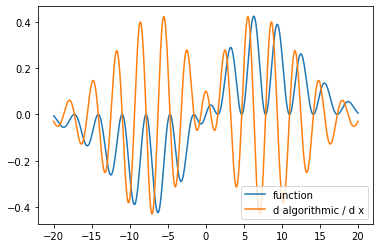

In [35]:
x = np.linspace(-20, 20, 1000)
plt.plot(x, [function(x,10) for x in x], label="function")
plt.plot(x, [alg_da(x,10) for x in x], label="d algorithmic / d x")
plt.legend()

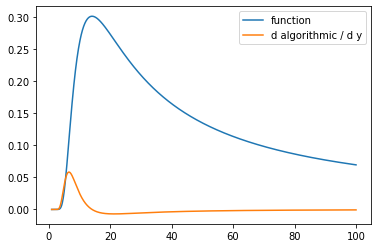

In [36]:
y = np.linspace(1, 100, 1000)
plt.plot(y, [function(10,y) for y in y], label="function")
plt.plot(y, [alg_db(10,y) for y in y], label="d algorithmic / d y")
plt.legend()

4. Implement a function for approximate numerical differentiation, given the difference size $h$.

In [37]:
def diff(f, x, h):
  return (f(x+h)-f(x))/h

5. Find the best difference size $h$ for differentiating
   * $f(3, 10)$ by $a$.
   * $f(1, 1)$ by $b$.

(Print the best step size, the derivative obtained and the difference between the numerical and the exact (algorithmic or symbolic) derivatives)

The best difference size minimizes the error of numerical differentiation relative to the exact differentiation.

Note: In this excercise it is recommended to use gradient descent, however a simple search is also accepted.


In [38]:
def curr_a(f, a):
  def g(b):
    return f(a, b)
  return g

def curr_b(f, b):
  def g(a):
    return f(a, b)
  return g

def df_optimize_h(a, b, byA=True):
    h = 1.
    dfa, dfb = algorithmic()
    if byA:
      prev_diff = 0
      min_diff = abs(dfa(a,b) - diff(curr_a(function, b), a, h))
      best_h_by_a = h
      constant = dfa(a, b)
      while h/10 > 0:
        h = h/10
        current_diff = abs(constant - diff(curr_a(function, b), a, h))
        if (current_diff < min_diff):
          min_diff = current_diff
          best_h_by_a = h
      return best_h_by_a
    else:
      prev_diff = 0
      min_diff = abs(dfb(a,b) - diff(curr_b(function, a), b, h))
      best_h_by_b = h
      constant = dfb(a, b)
      while h/10 > 0:
        h = h/10
        current_diff = abs(constant - diff(curr_b(function, a), b, h))
        if (current_diff < min_diff):
          min_diff = current_diff
          best_h_by_b = h
      return best_h_by_b

print("The most optimized h for f(3,10) by a is",df_optimize_h(3., 10.))
print("The most optimized h for f(1,1) by b is",df_optimize_h(1., 1.,False))

The most optimized h for f(3,10) by a is 1.0
The most optimized h for f(1,1) by b is 1.0000000000000002e-08


## Question 2: Optimization

### Logistic regression

Logistic regression is a statiscal model that models the probability of an event happening. In binary logistic regression there is a single binary dependent variable coded by '0' or '1'.

We can express the data as a tuple $(x,y)=(data,outcome)=(x,0/1)$

To model the probability of event $x$, we can use the logistic function $p(x)=\frac{1}{1+e^{-(x-\mu)/s}}$.

To find the appropiate $\mu$, that maximizes the classifaction accuracy we minimize the loss function $-\sum_{i=1}^N (y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i)))$.

In some cases, we give more importance to correctly classify one event over an other (like contracting an illness over not contracting it), and one way to express this is to add a "fixing parameter" in the loss function. One way this can be achieved is by adding weights: $-\sum_{i=1}^N (W_1y_i \log p(x_i) + W_2(1 - y_i) \log (1 - p(x_i)))$.


For a trial group of 20 rats, ratio of time exposed to a virus and the event of contracting that virus are given as a list of pairs (ratio, illness) (1 corresponds to having the illness):

In [39]:
rats = [(0.47, 0), (0.23, 0), (0.86, 1), (0.22, 0), (0.21, 1),
        (0.31, 0), (0.62, 0), (0.941, 1), (0.27, 0), (0.35, 1),
        (0.18, 0), (0.13, 0), (0.31, 1), (0.99, 1), (0.85, 1), 
        (0.35, 1), (0.6, 1), (0.89, 0), (0.6, 1), (0.92, 0)]

We want to predict rat illness based on the ratio of exposure to a virus. The prediction function is

$$illness = ratio \ge threshold.$$

The loss for this _classification_ problem is:

\begin{aligned}
& L = -\sum_{i=1}^N (W_1illness_i \log p_i + W_2(1 - illness_i) \log (1 - p_i)) \\
\mbox{where} & \\
& p_i = \frac 1 {1 + \exp(threshold - ratio_i)}
\\~\\
\mbox{and } &W_{1}, W_{2} \mbox{ are weights}
\end{aligned}

1. Implement the loss as a function of the threshold, and weights.

In [40]:
def rats_classification_loss(threshold, w1=1, w2=1, data=rats):
  sum = 0
  for ratio, illness in data:
    p = 1/(1+np.exp(threshold-ratio))
    sum += w1*illness*np.log(p) + w2*(1-illness)*np.log(1-p)
  return -sum

2. Plot the loss and the derivative of the loss by the threshold in the range $threshold \in (0.01, 0.99)$, and $ W_1, W_2 = 1$.

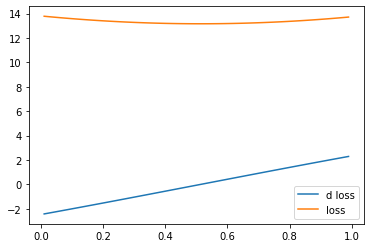

In [41]:
def rats_classification_loss_d(threshold, w1=1, w2=1):
  d = jax.grad(rats_classification_loss)
  return d(threshold,w1,w2)

x = np.linspace(0.01, 0.99, 100)
plt.plot(x, [rats_classification_loss_d(y) for y in x], label="d loss")
plt.plot(x, [rats_classification_loss(y) for y in x], label="loss")
plt.legend()

3. Find the best threshold using gradient descent, and $ W_1, W_2$ such that the number of true positives (rats which have the illness and were correctly classified) is greater than $80\%$, but the number of false positives ( rats which dont have the illness and were misclassified) is not $100\%$. (Note: you can fix $W_2$ to be 1)

In [42]:
def gd(f, x0, w1, w2, step=0.1, decay=0.995, niter=100):
  df = jax.grad(f)
  x = x0
  for i in range(niter):
    x -= df(x,w1,w2)*step
    step *= decay
  return x

def loss_best_threshold_gd():
  return gd(f=rats_classification_loss, x0=0. ,w1=1.2 ,w2=1)

print(loss_best_threshold_gd())

0.33654857


4. Find the best threshold using Newton's method, given $W_1, W_2$ from previous question. (Newton's method was explained in class). How many iterations were needed?

In [43]:
def newton(f, x0, w1, w2, niter=10):
  df = jax.grad(f)
  ddf = jax.grad(df)
  x = x0
  for i in range(niter):
    x = x - df(x,w1,w2)/ddf(x,w1,w2)
  return x
 
def loss_best_threshold_newton():
    return newton(f=rats_classification_loss, x0=0. ,w1=1.2 ,w2=1)

print(loss_best_threshold_newton())
print("10 iterations")

0.3365486
10 iterations


5. Show actual vs. predicted recoveries as a scatter plot for the best threshold. How many recoveries were misclassified?

Misclassified illness : 6


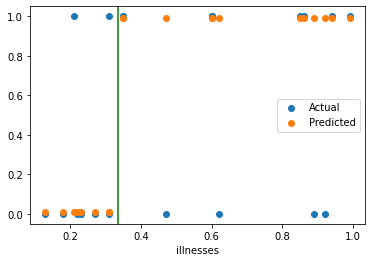

In [44]:
def misclassified_illness(data=rats):
    rats_actual_array = np.array(rats)
    rats_predicted_array = []
    best = loss_best_threshold_newton()
    sum = 0
    for l1,l2 in data:
      if (l1 < best and l2==1) or (l1 > best and l2==0):
        sum = sum+1
      if l1 > best:
        predicted = 0.99
      else:
        predicted = 0.01  
      rats_predicted_array.append([l1, predicted])
    rats_predicted_array = np.array(rats_predicted_array)
    ratio = rats_actual_array[:, 0]
    actual_illness = rats_actual_array[:, 1]
    predicted_illness = rats_predicted_array[:, 1]
    
    plt.scatter(x=ratio, y=actual_illness, label='Actual')
    plt.scatter(x=ratio, y=predicted_illness, label='Predicted')
    plt.axvline(x=best,color="green")
    plt.xlabel("ratios")
    plt.xlabel("illnesses")
    plt.legend()    
    return sum

print("Misclassified illness :", misclassified_illness())